# Exploration of data

In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_via_kaggle():
  import json
  import base64
  token = {"username":"NAME_HERE","key":"KEY_HERE"}
  !mkdir -p /root/.kaggle
  with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

  !kaggle config set -n path -v{/root}
  !chmod 600 ~/.kaggle/kaggle.json
  !kaggle datasets download --force -d corrieaar/apartment-rental-offers-in-germany -p /content
  !unzip -o /content/apartment-rental-offers-in-germany.zip -d /content
  !ls ~
  data = pd.read_csv('/content/immo_data.csv')
  return data

In [3]:
def load_via_gdrive():
  from google.colab import drive
  drive.mount("/content/gdrive")

  ## Google drive link to immo_data.csv
  data = pd.read_csv('/content/gdrive/My Drive/immo_data.csv')
  return data

In [5]:
gdrive_or_kaggle = input("do you want to use gdrive(1) or kaggle(2) or local(3) to download the data? ")
if (gdrive_or_kaggle == "1"):
  data = load_via_gdrive()
elif (gdrive_or_kaggle == "2"):
  data = load_via_kaggle()
else:
  data = pd.read_csv("immo_data.csv")

do you want to use gdrive(1) or kaggle(2) or local(3) to download the data? 1
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
data.shape

(268850, 49)

## Columns

The columns in the data are: 

| name | type | description |
|------|------|-------------|
| regio1 | nominal | region |
| serviceCharge | numeric | sum of other costs such as electricity or internet in eur |
| heatingType | nominal | type of heating |
| telekomTvOffer | nominal | is paid TV included, which offer |
| telekomHybridUploadSpeed | numeric |  hybrid internet upload speed. NA stands for no "hybrid" internet? we already have telekomUploadSpeed |
| newlyConst | boolean | is the  building newly constructed |
| balcony | boolean | does the listing have a balcony? |
| picturecount | numeric | how many pictures were uploaded with listing |
| pricetrend | numeric | price trend calculated by site. seems to be 0 - 15.  |
| telekomUploadSpeed | numeric | upload speed |
| totalRent | numeric | base rent + service charge + heating costs |
| yearConstructed | numeric | year constructed |
| scoutId | nominal | ID of listing on site. |
| noParkSpaces | numeric | number of parking spaces |
| firingTypes | nominal | main energy sources |
| hasKitchen | boolean | does listing have kitchen |
| geo_bln | nominal | same as regio1  |
| cellar | boolean | does listing have a cellar? |
| yearConstructedRange | nominal |  binned construction year, 1 to 9 |
| baseRent | numeric | base rent without electricity and heating |
| houseNumber | nominal | number of house in address |
| livingSpace | numeric | living space in square meters |
| geo_krs | nominal | district  |
| condition | nominal | condition of the flat |
| interiorQual | nominal | interior quality |
| petsAllowed | boolean | are pets allowed?  |
| street | nominal | name of street |
| streetPlain | nominal | street in plain text |
| lift | boolean | is elevator available? |
| baseRentRange | nominal | binned base rent |
| typeOfFlat | nominal | type of flat |
| geo_plz | nominal | zip code |
| noRooms | numeric | number of rooms |
| thermalChar | numeric | energy need in kWh / sqm |
| floor | numeric | which floor flat is on |
| numberOfFloors | numeric | number of floors in building |
| garden | boolean | does building have garden? |
| livingSpaceRange | nominal | binned living space range |
| regio2 | nominal | same as geo_krs |
| regio3 | nominal | city name |
| description | nominal | description of  |
| facilities | nominal | available facilities |
| heatingCosts | numerical | monthly costs of heating in eur |
| energyEfficiencyClass | nominal | energy efficiency, based on binned thermalChar, deprecated |
| lastRefurbished | numeric | year refurbished |
| electricityBasePrice | numeric | electricity base price, deprecated |
| electricityKwhPrice | numeric | electricity kwh price, deprecated |
| date | nominal | date posted |


**Replace all NaN values in nominal columns with the mean of the column and in numeric columns with the most frequent value in that column.**


In [7]:
from sklearn.impute import SimpleImputer

## Drop everything we think we won't need.
rentals = data.drop(columns=['street', 'streetPlain', 'description', 'facilities', 'date', 'houseNumber', 'geo_bln', 'geo_krs', 'telekomHybridUploadSpeed'])

nominal = ['regio1', 'heatingType', 'telekomTvOffer', 'newlyConst', 'balcony', 'firingTypes', 'hasKitchen', 'cellar', 'condition', 
           'interiorQual', 'geo_plz', 'petsAllowed', 'lift', 'typeOfFlat', 'garden', 'regio2', 'regio3', 'energyEfficiencyClass', 'scoutId']

numeric = ['serviceCharge', 'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'noParkSpaces', 'yearConstructedRange', 'baseRent',
           'livingSpace', 'baseRentRange', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange', 'livingSpaceRange', 'heatingCosts', 'lastRefurbish', 
           'electricityBasePrice', 'electricityKwhPrice']

columns = nominal + numeric

## Convert bools to int
rentals[['cellar', 'lift', 'hasKitchen', 'newlyConst', 'balcony', 'garden']] = rentals[['cellar', 'lift', 'hasKitchen', 'newlyConst', 'balcony', 'garden']].astype('int32')

rows_before = rentals.shape[0]
print('Rows:', rows_before)

Rows: 268850


**Exploring values of each column a little closer.**

In [8]:
rentals.describe()

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,268850.000000,268850.000000,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,268850.000000,268850.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,0.078747,0.616455,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,0.342407,0.640636,3.714544,6.941294e+02,74.355548,0.235529,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,0.196232,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.269343,0.486250,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,0.474516,0.479815,2.738134,1.953602e+04,254.759208,0.424330,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,0.397147,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,0.000000,0.000000,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,0.000000,0.000000,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,0.000000,0.000000,1.000000,3.380000e+02,54.000000,0.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,0.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,0.000000,1.000000,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,0.000000,1.000000,3.000000,4.900000e+02,67.320000,0.000000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,0.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,0.000000,1.000000,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,1.000000,1.000000,5.000000,7.990000e+02,87.000000,0.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,0.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,1.000000,1.000000,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,1.000000,1.000000,9.000000,9.999999e+06,111111.000000,1.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,1.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [9]:
for col in columns:  
  counts = rentals[col].value_counts(dropna=False).sort_index()
  print(counts, '\n')

Baden_Württemberg         16091
Bayern                    21609
Berlin                    10406
Brandenburg                6954
Bremen                     2965
Hamburg                    3759
Hessen                    17845
Mecklenburg_Vorpommern     6634
Niedersachsen             16593
Nordrhein_Westfalen       62863
Rheinland_Pfalz            8368
Saarland                   1429
Sachsen                   58154
Sachsen_Anhalt            20124
Schleswig_Holstein         6668
Thüringen                  8388
Name: regio1, dtype: int64 

central_heating                   128977
combined_heat_and_power_plant       1978
district_heating                   24808
electric_heating                     901
floor_heating                      17697
gas_heating                        19955
heat_pump                           2737
night_storage_heater                1341
oil_heating                         5042
self_contained_central_heating     19087
solar_heating                        166
stove_he

**Remove rows that have suspect values.**

In [10]:
rentals = rentals[
  ((rentals['totalRent'] < 2500) | (rentals['totalRent'].isnull())) &
  ((rentals['floor'] < 56) | (rentals['floor'].isnull())) &
  ((rentals['numberOfFloors'] < 56) | (rentals['numberOfFloors'].isnull())) &
  ((rentals['noRooms'] < 50) | (rentals['noRooms'].isnull())) &
  ((rentals['noParkSpaces'] < 100) | (rentals['noParkSpaces'].isnull())) &
  (((rentals['yearConstructed'] >= 1800) & (rentals['yearConstructed'] <= 2020)) | (rentals['yearConstructed'].isnull())) &
  (((rentals['lastRefurbish'] >= 1900) & (rentals['lastRefurbish'] <= 2020)) | (rentals['lastRefurbish'].isnull())) &
  ((rentals['serviceCharge'] < 2500)) &
  ((rentals['heatingCosts'] < 2500) | (rentals['heatingCosts'].isnull())) &
  ((rentals['totalRent'] < 2500) | (rentals['totalRent'].isnull())) &
  ((rentals['pricetrend'] < 15))
]

rows = rentals.shape[0]
print('Rows removed:', rows_before - rows) 

Rows removed: 13225


In [11]:
rentals.shape

(255625, 40)

In [12]:
for col in columns:  
  counts = rentals[col].value_counts(dropna=False).sort_index()
  print(counts, '\n')

Baden_Württemberg         14633
Bayern                    19515
Berlin                     9311
Brandenburg                6652
Bremen                     2744
Hamburg                    3286
Hessen                    16390
Mecklenburg_Vorpommern     6443
Niedersachsen             15656
Nordrhein_Westfalen       60418
Rheinland_Pfalz            7783
Saarland                   1308
Sachsen                   57139
Sachsen_Anhalt            19780
Schleswig_Holstein         6414
Thüringen                  8153
Name: regio1, dtype: int64 

central_heating                   124662
combined_heat_and_power_plant       1892
district_heating                   23797
electric_heating                     860
floor_heating                      16104
gas_heating                        18987
heat_pump                           2543
night_storage_heater                1320
oil_heating                         4793
self_contained_central_heating     18448
solar_heating                        152
stove_he

In [13]:
rentals.describe()

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,255625.000000,255625.000000,255625.000000,255625.000000,255625.000000,225232.000000,218264.000000,202694.000000,2.556250e+05,87697.000000,255625.000000,255625.000000,202694.00000,255625.000000,255625.000000,255625.000000,255625.000000,255625.000000,255625.000000,156900.000000,209255.000000,164083.000000,255625.000000,255625.000000,255625.000000,83899.000000,76882.000000,44530.000000,44530.000000
mean,146.336158,0.075896,0.614885,9.710326,3.343904,28.852318,768.311833,1967.403317,1.069581e+08,1.253931,0.332847,0.644874,3.66520,610.027889,72.385294,0.229410,3.664164,36743.242105,2.605202,115.204624,2.091439,3.513868,2.551566,0.195122,3.017213,73.918085,2013.785177,89.116104,0.199857
std,77.336569,0.264833,0.486623,6.290899,1.950330,16.331352,420.754643,38.398345,1.253167e+07,2.800256,0.471233,0.478552,2.69817,410.366774,137.871052,0.420454,2.136146,27703.138821,0.967414,61.787826,1.648920,1.949621,0.919737,0.396295,1.351265,38.125666,7.545243,5.392103,0.009683
min,0.000000,0.000000,0.000000,0.000000,-12.330000,1.000000,0.000000,1800.000000,2.887174e+07,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1900.000000,71.430000,0.170500
25%,95.000000,0.000000,0.000000,6.000000,1.960000,10.000000,465.000000,1950.000000,1.066894e+08,1.000000,0.000000,0.000000,1.00000,333.000000,54.000000,0.000000,2.000000,9126.000000,2.000000,80.000000,1.000000,2.000000,2.000000,0.000000,2.000000,53.990000,2012.000000,90.760000,0.191500
50%,134.000000,0.000000,1.000000,9.000000,3.330000,40.000000,638.000000,1972.000000,1.111553e+08,1.000000,0.000000,1.000000,3.00000,480.000000,66.980000,0.000000,3.000000,38226.000000,3.000000,107.000000,2.000000,3.000000,3.000000,0.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,184.000000,0.000000,1.000000,13.000000,4.530000,40.000000,955.000000,1996.000000,1.137670e+08,1.000000,1.000000,1.000000,5.00000,775.000000,85.000000,0.000000,5.000000,55543.000000,3.000000,140.800000,3.000000,4.000000,3.000000,0.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,2300.000000,1.000000,1.000000,121.000000,14.920000,100.000000,2499.590000,2020.000000,1.157117e+08,99.000000,1.000000,1.000000,9.00000,39200.000000,66100.000000,1.000000,9.000000,99998.000000,45.000000,1996.000000,45.000000,54.000000,5.000000,1.000000,7.000000,2029.500000,2020.000000,90.760000,0.227600


**Plots**

In [14]:
import matplotlib.pyplot as plt

In [15]:
## Remove all rows with totalRent NAN
rentals = rentals[rentals['totalRent'] < 2500]

## Use Simple Imputer to replace all missing nominal values with the most frequent value.
for col in nominal:
  imp_mfreq = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=rentals[col].mode()[0])
  rentals[[col]] = imp_mfreq.fit_transform(rentals[[col]])
    
## Use Simple Imputer to replace all missing numeric values with the mean value.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
rentals[numeric] = imp_mean.fit_transform(rentals[numeric])

# Convert columns to better data types.
rentals[['yearConstructed', 'noRooms', 'floor', 'lastRefurbish', 'noParkSpaces', 'numberOfFloors']] = rentals[['yearConstructed', 'noRooms', 'floor', 'lastRefurbish', 'noParkSpaces', 'numberOfFloors']].astype('int32')

In [16]:
def plot_columns_scatter(ax1, ax2):
  plt.scatter(rentals[ax1], rentals[ax2])
  plt.xlabel(ax1)
  plt.ylabel(ax2)
  plt.show()

def plot_hist(column,pos=None, labels=None, bins=None):
  plt.hist(rentals[column], bins=bins)
  if pos != None and labels != None:
    plt.xticks(pos, labels=labels)
  plt.xticks(range(10), rotation=45)
  plt.show()

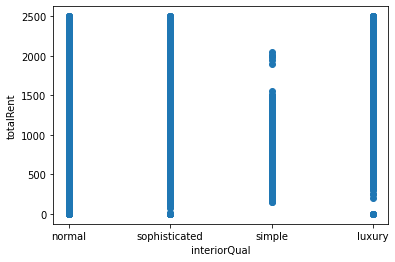

In [17]:
plot_columns_scatter('interiorQual', 'totalRent')

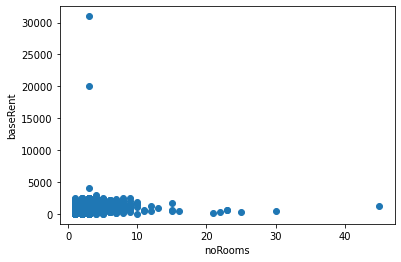

In [18]:
plot_columns_scatter('noRooms', 'baseRent')

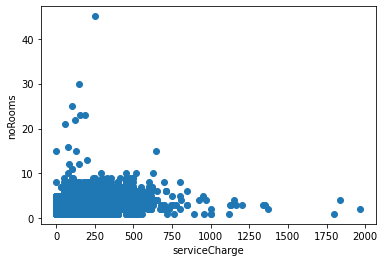

In [19]:
plot_columns_scatter('serviceCharge', 'noRooms')

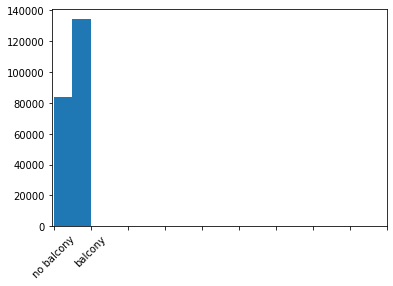

In [20]:
plot_hist('balcony', [0.25, 0.75], ['no balcony', 'balcony'], bins=2)

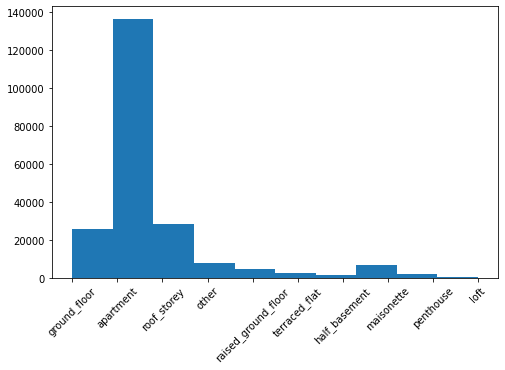

In [21]:
plt.figure(figsize=(8,5))
plot_hist('typeOfFlat')

# Attaching location to listings 
This is hard: we know the address, but geocoding lat/long for 260k german addresses would cost around 300+ eur at the cheapest, and would take several days because of API limits.


We decided to try zip codes. We found a raw datasource (SQL script) with each location name + zip code mapping to a latitude and longitude. Loaded that into SQLite, and outputted CSV https://github.com/magnuspaal/germany-rental-ml/tree/master/data/zip.

To add lat and long to the listings, we do SQL equivalent of an inner join three times, on the region, district and city name, and then concat them all together. We then drop duplicates that share the listing ID.
We lose around 60k listings from this.




In [22]:
#!wget https://raw.githubusercontent.com/magnuspaal/germany-rental-ml/master/data/zip/zip_city_lat_lon.csv
!curl -O https://raw.githubusercontent.com/magnuspaal/germany-rental-ml/master/data/zip/zip_city_lat_lon.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  738k  100  738k    0     0  3450k      0 --:--:-- --:--:-- --:--:-- 3450k


In [23]:
#zip_codes = pd.read_csv('/content/zip_city_lat_lon.csv')
#zip_codes = pd.read_csv('/content/zip_lat_lon.csv', quotechar='"')
zip_codes = pd.read_csv('zip_city_lat_lon.csv')

zip_codes = zip_codes.drop_duplicates(subset =['zip', 'city'], 
                    keep = False)

zip_codes['city'] = zip_codes.apply(lambda x: "_".join(x['city'].split(' ')), axis=1)

In [24]:
import matplotlib.pyplot as plt

lat_mean = zip_codes['lat'].mean()
lon_mean = zip_codes['lon'].mean()


normalized_zip_codes = pd.DataFrame()
normalized_zip_codes['lat'] = zip_codes['lat'] - lat_mean
normalized_zip_codes['lon'] = zip_codes['lon'] - lon_mean

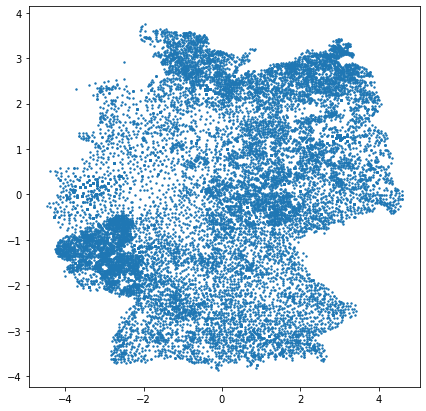

In [25]:
# visualizing the zip codes: we should see a nice germany here now
plt.figure(figsize=(7,7))
plt.scatter(normalized_zip_codes['lon'], normalized_zip_codes['lat'], s=2)
plt.show()

In [26]:
rental_location_data_city_match = pd.merge(rentals, zip_codes, how='inner', left_on=['geo_plz', 'regio1'], right_on=['zip', 'city'])
rental_location_data_district_match = pd.merge(rentals, zip_codes, how='inner', left_on=['geo_plz', 'regio2'], right_on=['zip', 'city'])
rental_location_data_region_match = pd.merge(rentals, zip_codes, how='inner', left_on=['geo_plz', 'regio3'], right_on=['zip', 'city'])

# concat them all together
rental_location_data = pd.concat([rental_location_data_city_match, rental_location_data_district_match, rental_location_data_region_match])

# remove those that might have gotten together
rental_location_data = rental_location_data.drop_duplicates(subset=['scoutId'])

print(f"With location data attached, went from {rentals.shape[0]} rows to {rental_location_data.shape[0]}")

With location data attached, went from 218264 rows to 160085


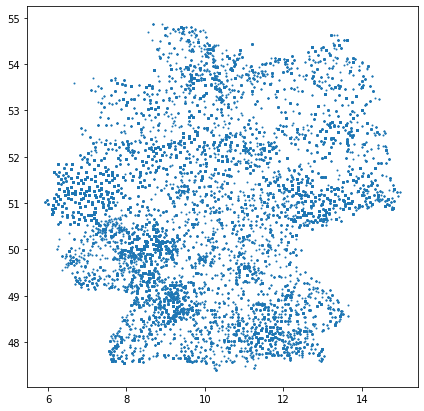

In [27]:
# below is map of the rental listings
plt.figure(figsize=(7,7))
plt.scatter(rental_location_data['lon'], rental_location_data['lat'], s=1)
plt.show()

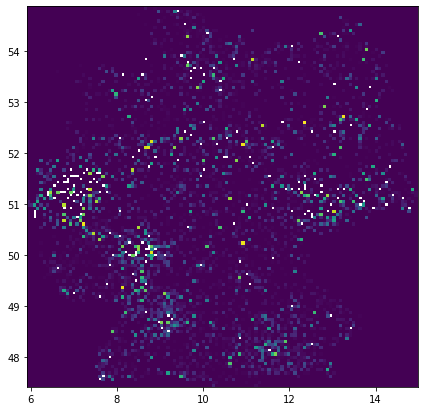

In [28]:
# Visualize density
plt.figure(figsize=(7,7))
plt.hist2d(rental_location_data['lon'], rental_location_data['lat'], bins=120, cmax=100)
plt.show()

In [29]:
rental_price_long_lat = rental_location_data[['totalRent', 'lon', 'lat']]
rental_price_long_lat['lon'] = rental_price_long_lat['lon'] - rental_price_long_lat['lon'].mean()
rental_price_long_lat['lat'] = rental_price_long_lat['lat'] - rental_price_long_lat['lat'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
import seaborn as sns
import skimage.measure

from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.interpolate import griddata

x = rental_price_long_lat['lon'].to_numpy()
y = rental_price_long_lat['lat'].to_numpy()
z = rental_price_long_lat['totalRent'].to_numpy()



#pivoted = pd.pivot_table(rental_price_long_lat,
#    values='totalRent', index=['lon'], columns=['lat'],
#    fill_value=0, aggfunc='sum')

#reduced = skimage.measure.block_reduce(pivoted, (30,30), np.average)

#plt.figure(figsize=(10, 10))
#plt.imshow(reduced, vmax=10)
#plt.show()

#ax = np.imshow(reduced, square=True, vmax=100)
#ax.set_xticks([])
#ax.set_yticks([])
#plt.show()

In [31]:
## Install
# !pip install googlemaps
# !pip install ortools
# !pip install gmaps
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [32]:
from IPython.display import display, HTML
from ipywidgets.embed import embed_minimal_html

import gmaps

gmaps.configure(api_key='API-KEY')

In [33]:
locations = []
weights = []

for index, row in rental_location_data.iterrows():
  locations.append((row['lat'], row['lon']))
  weights.append(row['totalRent'])

In [34]:
figure_layout = {
    'width': '600px',
    'height': '600px',
}

fig = gmaps.figure(layout=figure_layout)

heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
fig.add_layer(heatmap_layer)

embed_minimal_html('map.html', views=[fig])
display(HTML(filename='map.html'))

Output hidden; open in https://colab.research.google.com to view.

# Saving the dataset


In [ ]:
from google.colab import files

rental_location_data.to_csv("rental_location_data.csv")
rental_location_data.to_csv("rental.csv")

# be sure to allow 
files.download("rental_location_data.csv")
files.download("rental.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>